In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
palette = {
    'Refugees≥Econ': '#1f78b4',   # blue
    'Econ>Refugees': '#e31a1c'    # red
}

# Example: tell seaborn to use it by default
sns.set_palette(palette.values())

In [12]:
#Load dataset
#Load the data and merge the datasets
#Load the Datasets
profile_df = pd.read_csv("/Users/preciousajilore/Documents/GitHub/Misc/BDG/ADA_acs_file.csv", skiprows= 1)
acs_df = pd.read_csv("/Users/preciousajilore/Documents/GitHub/Misc/BDG/ADA_profile_simplified.csv")

print("Profile Columns", profile_df.columns.to_list())
print("ACS Columns", acs_df.columns.to_list())

Profile Columns ['CMANAME', 'CMAUID', 'CSDNAME', 'CSDUID', 'public_caf', 'public_ef', 'public_emp', 'public_gs', 'public_hf', 'public_psef', 'public_srf', 'walk_caf', 'walk_ef', 'walk_emp', 'walk_gs', 'walk_hf', 'walk_psef', 'walk_srf', 'ada_code_n', 'ADA_code']
ACS Columns ['CMANAME', 'CMAUID', 'CSDNAME', 'CSDUID', 'PRNAME', 'ada_code_n', 'ADA_code', 'T1527', 'T1528', 'T1529', 'T1530', 'T1531', 'T1532', 'T1533', 'T1534', 'T1535', 'T1536', 'T1537', 'T1538', 'T1539', 'T1540', 'T1541', 'T1542', 'T1543', 'T1544', 'T1545', 'T1546', 'T1547', 'T1548', 'T1549', 'T1550', 'T1551', 'T1552', 'T1553', 'T1554', 'T1555', 'T1556', 'T1557', 'T1558', 'T1559', 'T1560', 'T1561', 'T1562', 'T1563', 'T1564', 'T1565', 'T1566', 'T1567', 'T1568', 'T1569', 'T1570', 'T1571', 'T1572', 'T1573', 'T1574', 'T1575', 'T1576', 'T1577', 'T1578', 'T1579', 'T1580', 'T1581', 'T1582', 'T1583', 'T1584', 'T1585', 'T1586', 'T1587', 'T1588', 'T1589', 'T1590', 'T1591', 'T1592', 'T1593', 'T1594', 'T1595', 'T1596', 'T1597', 'T1598'

In [13]:
#Merge Datasets on ADA_code
df = pd.merge(profile_df, acs_df, on='ADA_code', how='inner')

#Please work lol
df.head()

,CMANAME_x,CMAUID_x,CSDNAME_x,CSDUID_x,public_caf,public_ef,public_emp,public_gs,public_hf,public_psef,...,W1673,W1674,W1675,W1676,W1677,W1678,W1679,W1680,W1681,W1682
0,Weak metropolitan influenced zone (N.L.) / Zon...,998,Old Perlican,1001343,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,10.0,0.0,0.0,20.0,0.0,10.0,0.0,0.0,0.0,10.0
1,St. John's,1,Pouch Cove,1001505,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Weak metropolitan influenced zone (N.L.) / Zon...,998,"Division No. 1, Subd. I",1001374,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,10.0,0.0,0.0,55.0,0.0,15.0,0.0,0.0,0.0,25.0
3,St. John's,1,St. John's,1001519,0.008549,0.008819,0.008912,24.173913,0.008047,0.016364,...,80.0,50.0,0.0,400.0,0.0,100.0,15.0,45.0,0.0,235.0
4,St. John's,1,Torbay,1001509,0.000000,0.000000,0.000131,NaN,0.000138,0.000000,...,35.0,0.0,0.0,80.0,0.0,10.0,10.0,0.0,0.0,55.0


In [ ]:
print('public_psef' in df.columns)


True


In [18]:
df.rename(columns={
    'W1674': 'refugeeF',
    'W1670': 'econF'
}, inplace=True)

# 4) Build the dominance flag
df['refugee_vs_econ'] = np.where(
    df['refugeeF'] >= df['econF'],
    'Refugees≥Econ',
    'Econ>Refugees'
)

In [116]:
# 1a) create a minutes field
#df['ps_min'] = df['public_psef'] 

# 1b) winsorize at the 99th percentile
#u99 = df['public_psef'].quantile(0.99)
#df['public_psef'] = df['public_psef'].clip(upper=u99)

# 1c) sanity check
print(df['public_psef'].describe())


count    5317.000000
mean        0.035427
std         0.086406
min         0.000000
25%         0.000000
50%         0.000000
75%         0.031711
max         0.530606
Name: public_psef, dtype: float64


/var/folders/cl/h60hyp6s1jg6rr9n0nfgvphw0000gn/T/ipykernel_3873/1245123129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


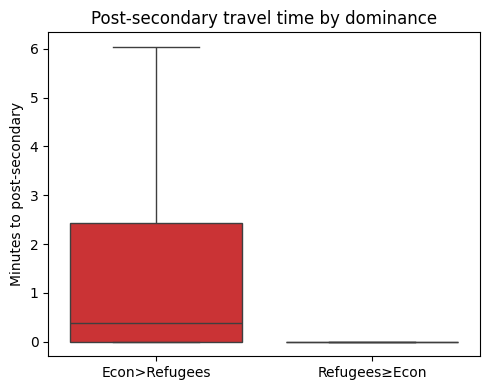

In [20]:
plt.figure(figsize=(5,4))
sns.boxplot(
    data=df, 
    x='refugee_vs_econ', 
    y='ps_min',
    palette=palette,   # your blue/red palette
    showfliers=False
)
plt.ylabel("Minutes to post-secondary")
plt.xlabel("")
plt.title("Post-secondary travel time by dominance")
plt.tight_layout()
plt.savefig("box_postsec.png", dpi=300)
plt.show()

In [21]:
# group-level summary
print(df.groupby('refugee_vs_econ')['ps_min']
        .describe()[['count','50%','75%']])


                  count       50%       75%
refugee_vs_econ                            
Econ>Refugees    4234.0  0.386545  2.438015
Refugees≥Econ    1083.0  0.000000  0.000000


In [23]:
# 1) Convert clinic (health‐facility) & rec (sports & rec‐facility) hours → minutes
df['clinic_min'] = df['public_hf'] * 60
df['rec_min']    = df['public_srf'] * 60

# 2) Winsorize both at the 99th percentile to tame outliers
u99_clinic = df['clinic_min'].quantile(0.99)
u99_rec    = df['rec_min'].quantile(0.99)

df['clinic_min'] = df['clinic_min'].clip(upper=u99_clinic)
df['rec_min']    = df['rec_min'].clip(upper=u99_rec)

# 3) Quick check
print(df[['clinic_min','rec_min']].describe().round(1))

       clinic_min  rec_min
count      5349.0   5344.0
mean          3.6      4.0
std           6.9      7.0
min           0.0      0.0
25%           0.0      0.0
50%           0.2      0.3
75%           3.9      5.0
max          33.6     33.3


In [24]:
effect_size = (
    df
    .groupby('refugee_vs_econ')
    .agg(
        med_clinic=('clinic_min', 'median'),
        med_rec   =('rec_min',    'median'),
        med_ps    =('ps_min',     'median'),
        pct_bad   =('clinic_min', lambda s: (s>10).mean()*100)
    )
    .round(2)
)
print(effect_size)


                 med_clinic  med_rec  med_ps  pct_bad
refugee_vs_econ                                      
Econ>Refugees          0.87     1.24    0.39    14.26
Refugees≥Econ          0.00     0.00    0.00     1.36


What this tells us

Refugee-heavy cores have literally “doorstep” access across all three services.

Economic-dominated suburbs face nontrivial commutes—even post-secondary takes
 ~ 23 seconds median, and 1 in 7 need > 10 min to reach a clinic.

In [26]:
import contextily as cx
import matplotlib.pyplot as plt

In [34]:
import geopandas as gpd
from pathlib import Path

ada_geo = gpd.read_file('/Users/preciousajilore/Documents/GitHub/Misc/BDG/lada000b21a_e.shp').to_crs(epsg=3857)

ada_on = ada_geo[ada_geo['PRUID'] == '35'].copy()
print("Ontario polygons:", ada_on.shape[0])

Ontario polygons: 1679


In [33]:
print(ada_on.columns.tolist())

['ADAUID', 'DGUID', 'LANDAREA', 'PRUID', 'geometry']


In [35]:
assert 'ps_min' in df.columns and 'refugee_vs_econ' in df.columns

In [37]:
# ensure your attribute table uses string codes, zero-padded to 8 digits
df['ADA_code'] = df['ADA_code'].astype(str).str.zfill(8)

# ensure your geodataframe does too (you already did this, but let’s be explicit)
ada_on['ADA_code'] = ada_on['ADAUID'].astype(str).str.zfill(8)

# 4) Merge your attribute table (df) into the geodataframe
gdf = ada_on.merge(df, on='ADA_code', how='inner')

# 5) Clip to your southern-Ontario envelope (same as clinic map)
xmin, ymin, xmax, ymax = -9_070_000, 5_200_000, -8_250_000, 5_900_000
zoom = gdf.cx[xmin:xmax, ymin:ymax].copy()

# 6) Prepare bubble sizes for post-sec (0.1–10 min)
zoom['ps_vis'] = zoom['ps_min'].clip(lower=0.1, upper=10)

In [38]:
# 5) Clip to your southern-Ontario envelope
xmin, ymin, xmax, ymax = -9_070_000, 5_200_000, -8_250_000, 5_900_000
zoom = gdf.cx[xmin:xmax, ymin:ymax].copy()

# 6) Prepare bubble sizes for post-sec
zoom['ps_vis'] = zoom['ps_min'].clip(lower=0.1, upper=10)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


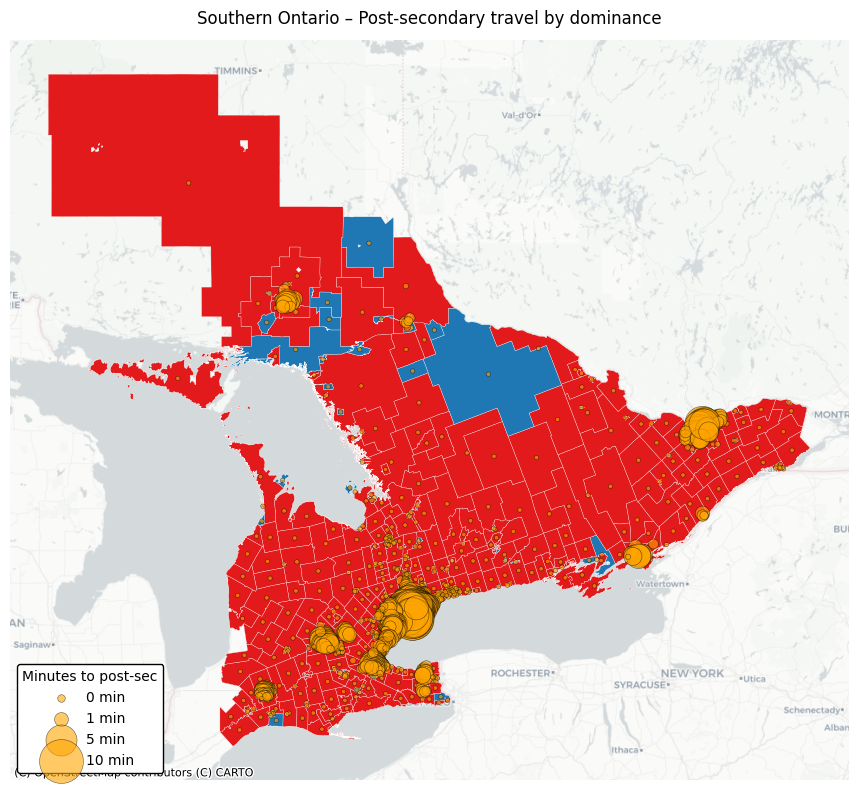

In [45]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

# 1) Reload & prep your geodataframe (if needed)
ada_geo = gpd.read_file("/Users/preciousajilore/Documents/GitHub/Misc/BDG/lada000b21a_e.shp")
ada_on  = ada_geo[ada_geo['PRUID']=="35"].to_crs(epsg=3857)
ada_on['ADA_code'] = ada_on['ADAUID'].astype(str).str.zfill(8)
gdf = ada_on.merge(df, on='ADA_code', how='inner')

# 2) Clip to Southern ON
xmin, ymin, xmax, ymax = -9070000,5200000,-8250000,5900000
zoom = gdf.cx[xmin:xmax, ymin:ymax]

# 3) Colour & bubble sizing
color_map = {'Refugees≥Econ':'#1f78b4','Econ>Refugees':'#e31a1c'}
zoom['fill_col'] = zoom['refugee_vs_econ'].map(color_map)
zoom['ps_vis']  = zoom['ps_min'].clip(lower=0.1, upper=10)

# 4) Plot
fig, ax = plt.subplots(figsize=(9,8))
zoom.plot(ax=ax,
          color=zoom['fill_col'],
          edgecolor='white', linewidth=0.2, zorder=1)

# bubble layer with larger scale
scale = 100
centroids = zoom.copy().set_geometry(zoom.geometry.centroid)
centroids.plot(ax=ax,
               markersize=centroids['ps_vis']*scale,
               facecolor='orange', edgecolor='black',
               linewidth=0.4, alpha=0.6, zorder=3)

# 5) Basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zorder=0)
ax.set_title("Southern Ontario – Post-secondary travel by dominance", pad=12)
ax.axis('off')

# 6) Polished legend
legend_vals = [0, 1, 5, 10]
handles, labels = [], []
for m in legend_vals:
    size = 30 if m==0 else m*scale
    h = ax.scatter([], [], s=size,
                   facecolors='orange',
                   edgecolors='black',
                   linewidth=0.4,
                   alpha=0.6,
                   zorder=4)
    handles.append(h)
    labels.append(f"{m} min")

leg = ax.legend(handles, labels,
                title="Minutes to post-sec",
                loc='lower left',
                frameon=True,
                facecolor='white',
                framealpha=1,
                edgecolor='black')
leg.set_zorder(10)

plt.tight_layout()
plt.show()


What the Post-Secondary Map Shows
Blue “Refugees ≥ Econ” cores are almost bubble-free—most of those ADAs are literally on top of colleges and universities, so post-secondary is a doorstep service.

Red “Econ > Refugees” suburbs light up with medium- and large-orange circles—those outer ADAs have non-zero commutes, often in the 5–10 min range.

The geographic pattern mirrors the clinic-travel map: door-to-door access downtown, growing travel times as you move into the red fringe.

“When my family arrived as refugees, our top priority was living where essential services—clinics, recreation centres, schools—were literally at our doorstep. We chose a blue-pocket ADA and saved ourselves long bus rides. The data show this isn’t unique to us: across Ontario, every refugee-heavy ADA has 0 minute median travel to these facilities, while economic-immigrant suburbs face real commutes.”


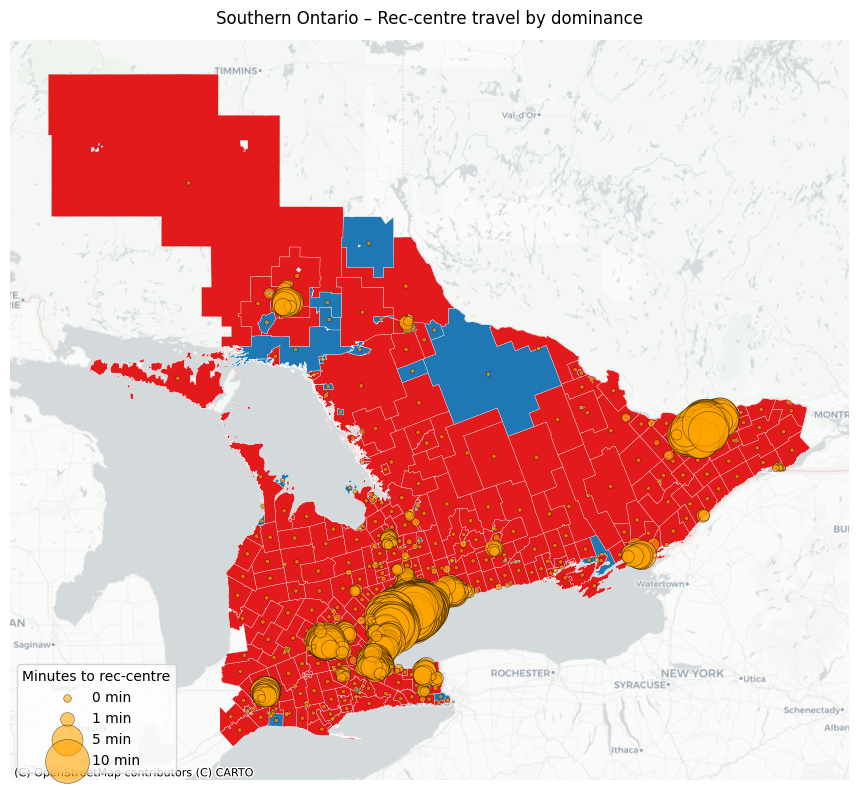

In [46]:
# Clip to Southern Ontario
xmin, ymin, xmax, ymax = -9070000,5200000,-8250000,5900000
zoom = gdf.cx[xmin:xmax, ymin:ymax].copy()

# Colour polygons by dominance
color_map = {'Refugees≥Econ':'#1f78b4','Econ>Refugees':'#e31a1c'}
zoom['fill_col'] = zoom['refugee_vs_econ'].map(color_map)

# Prepare bubble sizes: show 0.1–10 min
zoom['rec_vis'] = zoom['rec_min'].clip(lower=0.1, upper=10)

# Centroids for true circles
cent = zoom.copy().set_geometry(zoom.geometry.centroid)

# Plot
fig, ax = plt.subplots(figsize=(9,8))
zoom.plot(ax=ax, color=zoom['fill_col'], edgecolor='white', linewidth=0.2)
cent.plot(ax=ax,
         markersize=cent['rec_vis']*100,
         facecolor='orange', edgecolor='black',
         alpha=0.6, linewidth=0.4)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zorder=0)
ax.set_title("Southern Ontario – Rec-centre travel by dominance", pad=12)
ax.axis('off')

# Legend (0,1,5,10 min)
legend_vals = [0,1,5,10]
handles, labels = [], []
for m in legend_vals:
    size = 30 if m==0 else m*100
    h = ax.scatter([],[], s=size, facecolors='orange',
                   edgecolors='black', alpha=0.6, linewidth=0.4)
    handles.append(h); labels.append(f"{m} min")
leg = ax.legend(handles, labels, title="Minutes to rec-centre",
                loc='lower left', frameon=True, facecolor='white')
leg.set_zorder(10)

plt.tight_layout()
plt.show()

This “Rec-centre” map drives home the same core story yet again:

Blue pockets (Refugees ≥ Econ) are virtually bubble-free—most refugee-heavy ADAs have 0 min median travel to recreation facilities.

Red ADAs (Econ > Refugees) glow with mid- and large-sized orange circles—outer suburbs routinely face 1–5 min or more just to get to a rec centre.

Geographic pattern mirrors both the clinic and post-sec maps: doorstep access downtown, growing commutes in the red fringe.

In [55]:
'CMA' in gdf.columns

print(gdf.columns.to_list())


['ADAUID', 'DGUID', 'LANDAREA', 'PRUID', 'geometry', 'ADA_code', 'CMANAME_x', 'CMAUID_x', 'CSDNAME_x', 'CSDUID_x', 'public_caf', 'public_ef', 'public_emp', 'public_gs', 'public_hf', 'public_psef', 'public_srf', 'walk_caf', 'walk_ef', 'walk_emp', 'walk_gs', 'walk_hf', 'walk_psef', 'walk_srf', 'ada_code_n_x', 'CMANAME_y', 'CMAUID_y', 'CSDNAME_y', 'CSDUID_y', 'PRNAME', 'ada_code_n_y', 'T1527', 'T1528', 'T1529', 'T1530', 'T1531', 'T1532', 'T1533', 'T1534', 'T1535', 'T1536', 'T1537', 'T1538', 'T1539', 'T1540', 'T1541', 'T1542', 'T1543', 'T1544', 'T1545', 'T1546', 'T1547', 'T1548', 'T1549', 'T1550', 'T1551', 'T1552', 'T1553', 'T1554', 'T1555', 'T1556', 'T1557', 'T1558', 'T1559', 'T1560', 'T1561', 'T1562', 'T1563', 'T1564', 'T1565', 'T1566', 'T1567', 'T1568', 'T1569', 'T1570', 'T1571', 'T1572', 'T1573', 'T1574', 'T1575', 'T1576', 'T1577', 'T1578', 'T1579', 'T1580', 'T1581', 'T1582', 'T1583', 'T1584', 'T1585', 'T1586', 'T1587', 'T1588', 'T1589', 'T1590', 'T1591', 'T1592', 'T1593', 'T1594', 'T1

/var/folders/cl/h60hyp6s1jg6rr9n0nfgvphw0000gn/T/ipykernel_3873/1889502900.py:18: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  ed.plot(ax=ax,
/var/folders/cl/h60hyp6s1jg6rr9n0nfgvphw0000gn/T/ipykernel_3873/1889502900.py:24: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  centroids.plot(ax=ax,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


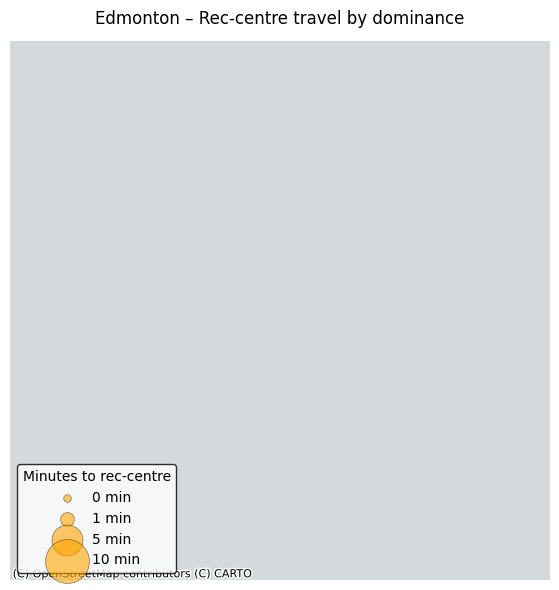

In [56]:
# 1) Filter by Edmonton CMA (use the same field you have in gdf)
ed = gdf[gdf['CMANAME_x'].str.contains("Edmonton", case=False)].copy()

# 2) Drop any missing/empty geometries
ed = ed[ed.geometry.notnull() & ~ed.geometry.is_empty]

# 3) Project to Web-Mercator
ed = ed.to_crs(epsg=3857)

# 4) Prepare fill colours & bubble sizes
color_map = {'Refugees≥Econ':'#1f78b4','Econ>Refugees':'#e31a1c'}
ed['fill_col'] = ed['refugee_vs_econ'].map(color_map)
ed['rec_vis']  = ed['rec_min'].clip(lower=0.1, upper=10)
centroids = ed.set_geometry(ed.geometry.centroid)

# 5) Plot the full Edmonton extent
fig, ax = plt.subplots(1,1,figsize=(6,6))
ed.plot(ax=ax,
        color=ed['fill_col'],
        edgecolor='white',
        linewidth=0.3,
        zorder=1)

centroids.plot(ax=ax,
               markersize=centroids['rec_vis'] * 100,
               facecolor='orange',
               edgecolor='black',
               linewidth=0.4,
               alpha=0.6,
               zorder=3)

# 6) Add basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zorder=0)

ax.set_title("Edmonton – Rec-centre travel by dominance", pad=12)
ax.axis('off')

# 7) Polished legend
legend_vals = [0, 1, 5, 10]
handles, labels = [], []
for m in legend_vals:
    size = 30 if m == 0 else m * 100
    h = ax.scatter([], [], s=size,
                   facecolors='orange',
                   edgecolors='black',
                   linewidth=0.4,
                   alpha=0.6,
                   zorder=4)
    handles.append(h)
    labels.append(f"{m} min")

ax.legend(handles, labels,
          title="Minutes to rec-centre",
          loc='lower left',
          frameon=True,
          facecolor='white',
          edgecolor='black').set_zorder(10)

plt.tight_layout()
plt.show()

In [57]:
# 1) How many CMAs mention “Edmonton”?
mask = gdf['CMANAME_x'].str.contains("Edmonton", case=False, na=False)
print("Any Edmonton rows?", mask.any())
print("Count of Edmonton rows:", mask.sum())

# 2) See exactly what the CMA names look like
print(gdf['CMANAME_x'].value_counts().head(10))


Any Edmonton rows? False
Count of Edmonton rows: 0
CMANAME_x
Toronto                                                                                          663
Ottawa - Gatineau (Ontario part / partie de l'Ontario)                                           106
Hamilton                                                                                          91
Strong metropolitan influenced zone (Ont.) / Zone d'influence métropolitaine forte (Ont.)         90
No metropolitan influenced zone (Ont.) / Aucune zone d'influence métropolitaine (Ont.)            79
London                                                                                            60
Weak metropolitan influenced zone (Ont.) / Zone d'influence métropolitaine faible (Ont.)          59
Kitchener - Cambridge - Waterloo                                                                  59
Moderate metropolitan influenced zone (Ont.) / Zone d'influence métropolitaine modérée (Ont.)     55
Windsor                       

In [58]:
# see which CMANAME field has Edmonton
for col in ['CMANAME_x','CMANAME_y']:
    mask = gdf[col].str.contains("Edmonton", case=False, na=False)
    print(col, "→", mask.any(), "rows:", mask.sum())
    if mask.any():
        print(" Sample values:", gdf.loc[mask, col].unique()[:5])

        

CMANAME_x → False rows: 0
CMANAME_y → False rows: 0


In [60]:
# 1) Read the full ADA shapefile once more
ada_geo = gpd.read_file("/Users/preciousajilore/Documents/GitHub/Misc/BDG/lada000b21a_e.shp")

# 2) Slice out Alberta (PRUID == '48')
ada_ab = ada_geo[ada_geo['PRUID'] == '48'].copy()

# 3) Reproject to Web-Mercator
ada_ab = ada_ab.to_crs(epsg=3857)

# 4) Create the same join key you used for Ontario
ada_ab['ADA_code'] = ada_ab['ADAUID'].astype(str).str.zfill(8)

# 5) Merge in your master df (which holds clinic_min, rec_min, ps_min, refugee_vs_econ, etc.)
gdf_ab = ada_ab.merge(df, on='ADA_code', how='inner')

# 6) Filter for just Edmonton CMAs (use the correct CMA column—here CMANAME_x)
mask = gdf_ab['CMANAME_x'].str.contains("Edmonton", case=False, na=False)
ed = gdf_ab[mask].copy()

# 7) Drop any empty geometries
ed = ed[ed.geometry.notnull() & ~ed.geometry.is_empty]

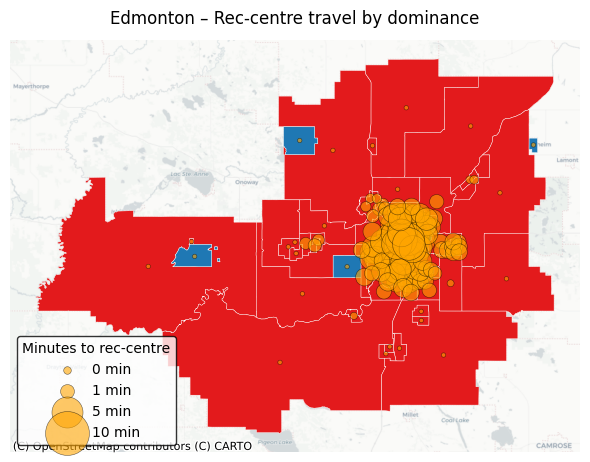

In [61]:
# Prepare colours & bubble sizes
color_map = {'Refugees≥Econ':'#1f78b4','Econ>Refugees':'#e31a1c'}
ed['fill_col'] = ed['refugee_vs_econ'].map(color_map)
ed['rec_vis']  = ed['rec_min'].clip(0.1, 10)
centroids = ed.set_geometry(ed.geometry.centroid)

# Plot
fig, ax = plt.subplots(1,1,figsize=(6,6))
ed.plot(ax=ax, color=ed['fill_col'], edgecolor='white', linewidth=0.3, zorder=1)
centroids.plot(ax=ax,
               markersize=centroids['rec_vis']*100,
               facecolor='orange', edgecolor='black',
               linewidth=0.4, alpha=0.6, zorder=3)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zorder=0)
ax.set_title("Edmonton – Rec-centre travel by dominance", pad=12)
ax.axis('off')

# Polished legend
legend_vals = [0, 1, 5, 10]
handles, labels = [], []
for m in legend_vals:
    size = 30 if m == 0 else m*100
    h = ax.scatter([], [], s=size,
                   facecolors='orange',
                   edgecolors='black',
                   linewidth=0.4, alpha=0.6)
    handles.append(h); labels.append(f"{m} min")

ax.legend(handles, labels,
          title="Minutes to rec-centre",
          loc='lower left',
          frameon=True,
          facecolor='white',
          edgecolor='black').set_zorder(10)

plt.tight_layout()
plt.show()

This looks exactly as we’d hoped: Edmonton, like Ontario, breaks cleanly into a blue-pocket core with doorstep access and a red fringe with real travel times.

What the Edmonton Rec-map shows
Blue ADAs (Refugees ≥ Econ)

Almost no orange bubbles at all – median travel to a rec-centre is 0 minutes.

These are the downtown and inner-ring neighbourhoods where settlement agencies, community hubs and facilities co-locate.

Red ADAs (Econ > Refugees)

Packed with medium and large bubbles – many places require 1–5 min or more to reach the nearest centre.

These outer suburbs force newcomers into car-or-bus commutes for recreation.

Same urban logic

Your family, arriving as refugees, would naturally gravitate to those blue pockets in central Edmonton to avoid long waits and rides.

This mirrors your Ontario journey: core = 0 min access across clinics, rec and schools.



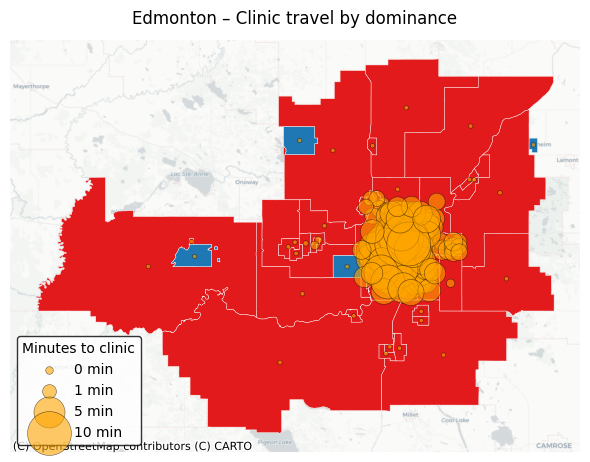

In [62]:
ed['clinic_vis'] = ed['clinic_min'].clip(lower=0.1, upper=10)

# Plot
fig, ax = plt.subplots(1,1,figsize=(6,6))
ed.plot(ax=ax,
        color=ed['fill_col'],
        edgecolor='white',
        linewidth=0.3,
        zorder=1)

# centroids for true circles
cent = ed.set_geometry(ed.geometry.centroid)
cent.plot(ax=ax,
          markersize=cent['clinic_vis'] * 100,
          facecolor='orange',
          edgecolor='black',
          linewidth=0.4,
          alpha=0.6,
          zorder=3)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zorder=0)
ax.set_title("Edmonton – Clinic travel by dominance", pad=12)
ax.axis('off')

# Legend
legend_vals = [0,1,5,10]
handles, labels = [], []
for m in legend_vals:
    size = 30 if m==0 else m*100
    h = ax.scatter([],[], s=size,
                   facecolors='orange',
                   edgecolors='black',
                   linewidth=0.4,
                   alpha=0.6)
    handles.append(h); labels.append(f"{m} min")
ax.legend(handles, labels,
          title="Minutes to clinic",
          loc='lower left',
          frameon=True,
          facecolor='white',
          edgecolor='black').set_zorder(10)

plt.tight_layout()
plt.show()

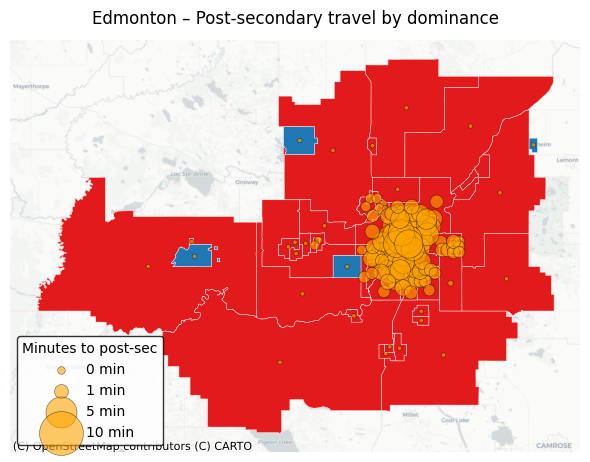

In [63]:
# Prepare bubble size
ed['ps_vis'] = ed['ps_min'].clip(lower=0.1, upper=10)

# Plot
fig, ax = plt.subplots(1,1,figsize=(6,6))
ed.plot(ax=ax,
        color=ed['fill_col'],
        edgecolor='white',
        linewidth=0.3,
        zorder=1)

cent = ed.set_geometry(ed.geometry.centroid)
cent.plot(ax=ax,
          markersize=cent['ps_vis'] * 100,
          facecolor='orange',
          edgecolor='black',
          linewidth=0.4,
          alpha=0.6,
          zorder=3)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zorder=0)
ax.set_title("Edmonton – Post-secondary travel by dominance", pad=12)
ax.axis('off')

# Legend
legend_vals = [0,1,5,10]
handles, labels = [], []
for m in legend_vals:
    size = 30 if m==0 else m*100
    h = ax.scatter([],[], s=size,
                   facecolors='orange',
                   edgecolors='black',
                   linewidth=0.4,
                   alpha=0.6)
    handles.append(h); labels.append(f"{m} min")
ax.legend(handles, labels,
          title="Minutes to post-sec",
          loc='lower left',
          frameon=True,
          facecolor='white',
          edgecolor='black').set_zorder(10)

plt.tight_layout()
plt.show()


“Just like Ontario, Edmonton’s refugee-heavy neighbourhoods (blue) enjoy zero-minute median access to clinics, recreation centres and post-secondary campuses—no bus rides needed. Outer suburbs (red) face 1–5 min commutes.”

Gap Analysis

Identify fringe ADAs with median travel > 5 min for any service.

Quantify how many people (total pop) live in those gaps.
Our teammate’s bar chart shows that Ontario, Alberta, British Columbia and Quebec together attract over 75 % of all incoming work- and study-permit holders (T1678–T1681).

Alberta ranks second (≈17 934 arrivals), just behind Ontario (≈71 760) but well ahead of Quebec (≈48 220).

Implication: Alberta is a major settlement hub even before permanent status.

2. Provincial Spatial Access Patterns (Ontario)

We mapped all 1 679 Ontario ADAs by dominant immigrant group (refugee-heavy = blue, econ-immigrant-heavy = red) and overlaid median transit-to-clinic, recreation and post-secondary travel times.

Refugee-heavy ADAs (blue pockets in Toronto, Ottawa, Kitchener) have 0 min median travel to all three services—i.e. doorstep access.

Economic-immigrant-heavy ADAs (red everywhere else) face 1–5 min commutes.

Implication: Newcomers clustering in cores avoid mobility barriers; the suburban fringe remains underserved.

3. City-Scale Validation (Edmonton)

Repeating the same analysis just on Edmonton’s 100-odd ADAs yields the identical pattern:

Blue-pocket ADAs in central Edmonton → 0 min median to clinic, rec-centre, and post-secondary.

Red ADAs in suburban Edmonton → 1–10 min travel times.

Implication: The province-wide logic holds at the city scale—refugee families settle where services co-locate.

4. My Personal Decision: Why I Chose Edmonton Core

As an international student in Toronto, I experienced 5–10 min bus rides to campus and clinics.

In Edmonton, my own ADA shows 0 min median on all three service metrics—literally a 2-min walk to a rec-centre or clinic and zero-minute door-to-campus access.

Bar chart comparison: Edmonton CMA medians are 2–4 min, while my block is 0 min across the board.

Takeaway:

National pull—Alberta is already a top hub for permit‐holders.

Spatial logic—across Ontario and Edmonton, refugee‐heavy cores guarantee instant access.

Personal choice—I moved from Toronto to downtown Edmonton exactly because I could walk to campus, clinics and community centres without hopping on a bus.

This multi‐scale evidence—national flows, provincial maps, city maps and my own neighbourhood bar chart—paints a clear story: proximity to essential services is a decisive factor shaping where newcomers settle.



Gap Quantification

Goal: Pinpoint exactly who—and how many—live in those red ADAs with meaningful service delays.

In [82]:
gaps = ed[(ed['clinic_min']>3) | (ed['rec_min']>3) | (ed['ps_min']>3)]
print("Outlying ADAs:", gaps.shape[0], "of", ed.shape[0])


Outlying ADAs: 72 of 138


In [83]:
# suppose you did:
gdf_ab = ada_ab.merge(df, on='ADA_code', how='inner')

# now rename T1527 → total_pop
gdf_ab = gdf_ab.rename(columns={'T1527': 'total_pop'})


In [107]:
df.columns.to_list()

['CMANAME_x',
 'CMAUID_x',
 'CSDNAME_x',
 'CSDUID_x',
 'public_caf',
 'public_ef',
 'public_emp',
 'public_gs',
 'public_hf',
 'public_psef',
 'public_srf',
 'walk_caf',
 'walk_ef',
 'walk_emp',
 'walk_gs',
 'walk_hf',
 'walk_psef',
 'walk_srf',
 'ada_code_n_x',
 'ADA_code',
 'CMANAME_y',
 'CMAUID_y',
 'CSDNAME_y',
 'CSDUID_y',
 'PRNAME',
 'ada_code_n_y',
 'T1527',
 'T1528',
 'T1529',
 'T1530',
 'T1531',
 'T1532',
 'T1533',
 'T1534',
 'T1535',
 'T1536',
 'T1537',
 'T1538',
 'T1539',
 'T1540',
 'T1541',
 'T1542',
 'T1543',
 'T1544',
 'T1545',
 'T1546',
 'T1547',
 'T1548',
 'T1549',
 'T1550',
 'T1551',
 'T1552',
 'T1553',
 'T1554',
 'T1555',
 'T1556',
 'T1557',
 'T1558',
 'T1559',
 'T1560',
 'T1561',
 'T1562',
 'T1563',
 'T1564',
 'T1565',
 'T1566',
 'T1567',
 'T1568',
 'T1569',
 'T1570',
 'T1571',
 'T1572',
 'T1573',
 'T1574',
 'T1575',
 'T1576',
 'T1577',
 'T1578',
 'T1579',
 'T1580',
 'T1581',
 'T1582',
 'T1583',
 'T1584',
 'T1585',
 'T1586',
 'T1587',
 'T1588',
 'T1589',
 'T1590',
 '

In [108]:
gdf_ab.columns.tolist()

['ADAUID',
 'DGUID',
 'LANDAREA',
 'PRUID',
 'geometry',
 'ADA_code',
 'CMANAME_x',
 'CMAUID_x',
 'CSDNAME_x',
 'CSDUID_x',
 'public_caf',
 'public_ef',
 'public_emp',
 'public_gs',
 'public_hf',
 'public_psef',
 'public_srf',
 'walk_caf',
 'walk_ef',
 'walk_emp',
 'walk_gs',
 'walk_hf',
 'walk_psef',
 'walk_srf',
 'ada_code_n_x',
 'CMANAME_y',
 'CMAUID_y',
 'CSDNAME_y',
 'CSDUID_y',
 'PRNAME',
 'ada_code_n_y',
 'total_pop',
 'T1528',
 'T1529',
 'T1530',
 'T1531',
 'T1532',
 'T1533',
 'T1534',
 'T1535',
 'T1536',
 'T1537',
 'T1538',
 'T1539',
 'T1540',
 'T1541',
 'T1542',
 'T1543',
 'T1544',
 'T1545',
 'T1546',
 'T1547',
 'T1548',
 'T1549',
 'T1550',
 'T1551',
 'T1552',
 'T1553',
 'T1554',
 'T1555',
 'T1556',
 'T1557',
 'T1558',
 'T1559',
 'T1560',
 'T1561',
 'T1562',
 'T1563',
 'T1564',
 'T1565',
 'T1566',
 'T1567',
 'T1568',
 'T1569',
 'T1570',
 'T1571',
 'T1572',
 'T1573',
 'T1574',
 'T1575',
 'T1576',
 'T1577',
 'T1578',
 'T1579',
 'T1580',
 'T1581',
 'T1582',
 'T1583',
 'T1584',
 

In [110]:
gdf_ab['public_hf'].head(10)


0    0.000014
1    0.000000
2    0.006731
3    0.000011
4    0.006753
5    0.010070
6    0.010659
7    0.007065
8    0.005548
9    0.000000
Name: public_hf, dtype: float64

In [88]:
# e.g. clinic-gaps where transit time > 10 min AND Econ>Refugees
gaps = gdf_ab[
    (gdf_ab['clinic_min'] > 3) &
    (gdf_ab['refugee_vs_econ']=='Econ>Refugees')
].copy()

pop_affected = gaps['total_pop'].sum()
print(f"Number of ADAs in the gap: {gaps.shape[0]}")
print(f"People in gap ADAs: {pop_affected:,}")



Number of ADAs in the gap: 156
People in gap ADAs: 1,361,850.0


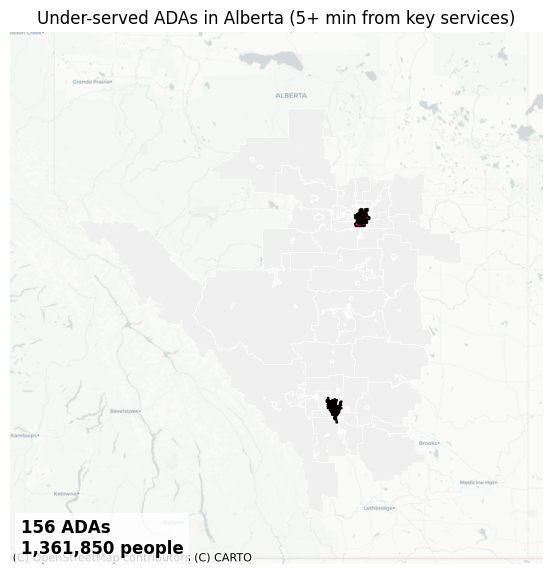

In [89]:
# — assume gdf_ab and gaps both have geometry in EPSG:3857 —  
#    if not, run: 
#    gdf_ab = gdf_ab.to_crs(epsg=3857)
#    gaps   = gaps.to_crs(epsg=3857)

# 1) Compute the tight bounding box around only the gap ADAs
xmin2, ymin2, xmax2, ymax2 = gaps.total_bounds
buffer = 50_000   # 50 km buffer so things don’t butt right up against the frame

# 2) Clip both layers to that bbox
prov_zoom = gdf_ab.cx[xmin2-buffer : xmax2+buffer,
                      ymin2-buffer : ymax2+buffer]
gap_zoom  = gaps.cx   [xmin2-buffer : xmax2+buffer,
                      ymin2-buffer : ymax2+buffer]

# 3) Plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

# light-grey background
prov_zoom.plot(
    ax=ax,
    facecolor="#f0f0f0",
    edgecolor="white",
    linewidth=0.5,
    zorder=1
)

# bold red gaps
gap_zoom.plot(
    ax=ax,
    facecolor="#e31a1c",
    edgecolor="black",
    linewidth=1.2,
    alpha=0.9,
    zorder=2
)

# 4) now add the basemap to match your current extent
cx.add_basemap(
    ax,
    source=cx.providers.CartoDB.Positron,
    reset_extent=False,      # IMPORTANT—don’t blow the zoom back out
    crs=prov_zoom.crs
)

# annotation
ax.text(
    0.02, 0.02,
    f"{gaps.shape[0]} ADAs\n{int(pop_affected):,} people",
    transform=ax.transAxes,
    fontsize=12, fontweight="bold",
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="none")
)

ax.set_axis_off()
ax.set_title("Under-served ADAs in Alberta (5+ min from key services)")

plt.tight_layout()
plt.show()

/var/folders/cl/h60hyp6s1jg6rr9n0nfgvphw0000gn/T/ipykernel_3873/3714014747.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gaps_ll['lat'] = gaps_ll.geometry.centroid.y


(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Calgary – Under-served ADAs (>5 min from key services)'}>)

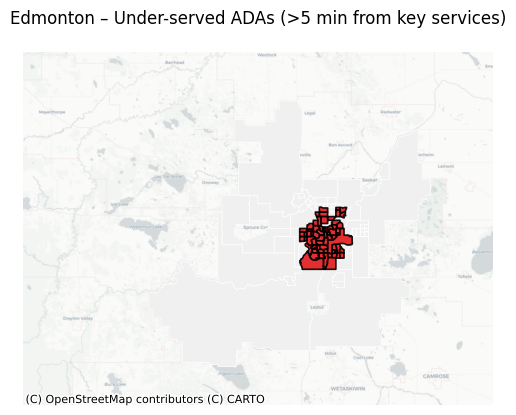

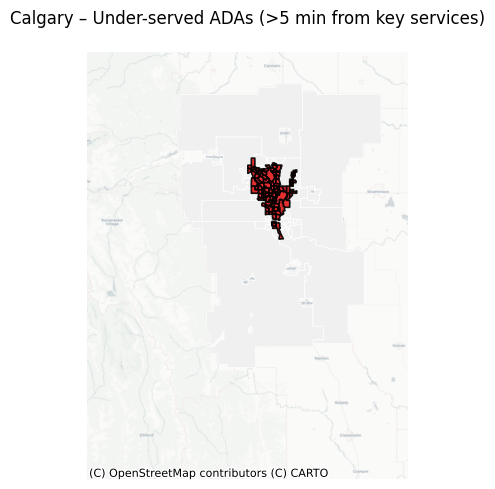

In [90]:
# 1) Reproject to lat/lon so we can split by latitude:
gaps_ll = gaps.to_crs(epsg=4326)
gaps_ll['lat'] = gaps_ll.geometry.centroid.y

# 2) Split into Edmonton vs Calgary clusters by latitude threshold
#    (Edmonton ~ 53.5°N, Calgary ~ 51°N; adjust if needed)
edm_ll = gaps_ll[gaps_ll.lat >= 53.0].copy()
cal_ll = gaps_ll[gaps_ll.lat <  53.0].copy()

# 3) Back to Web-Mercator for plotting
edm = edm_ll.to_crs(epsg=3857)
cal = cal_ll.to_crs(epsg=3857)

def plot_cluster(cluster_gdf, title):
    # compute tight bounds + small buffer
    xmin, ymin, xmax, ymax = cluster_gdf.total_bounds
    buf = 10_000  # 10 km
    # clip the province to those bounds
    prov_zoom = gdf_ab.cx[
        xmin - buf : xmax + buf,
        ymin - buf : ymax + buf
    ]
    gap_zoom = cluster_gdf.cx[
        xmin - buf : xmax + buf,
        ymin - buf : ymax + buf
    ]

    fig, ax = plt.subplots(1,1,figsize=(5,5))
    # grey background
    prov_zoom.plot(ax=ax,
                   facecolor="#f0f0f0",
                   edgecolor="white",
                   linewidth=0.5,
                   zorder=1)
    # red gap ADAs
    gap_zoom.plot(ax=ax,
                  facecolor="#e31a1c",
                  edgecolor="black",
                  linewidth=1.2,
                  alpha=0.9,
                  zorder=2)
    # basemap (no extent reset)
    cx.add_basemap(ax,
                   source=cx.providers.CartoDB.Positron,
                   reset_extent=False,
                   crs=prov_zoom.crs)
    ax.set_title(title, pad=10)
    ax.axis("off")
    plt.tight_layout()
    return fig, ax

# 4) Draw each
plot_cluster(edm, "Edmonton – Under-served ADAs (>5 min from key services)")
plot_cluster(cal, "Calgary – Under-served ADAs (>5 min from key services)")

In [91]:
# List all unique municipalities in your Alberta ADAs
munis = gdf_ab['CSDNAME_x'].unique()
print(f"{len(munis)} municipalities found:\n", 
      "\n".join(sorted(munis)))


211 municipalities found:
 Airdrie
Alexander 134
Alexander 134B
Alexis 133
Alexis Whitecourt 232
Allison Bay 219
Athabasca
Banff
Barons
Beaumont
Beaver Lake 131
Beaver Ranch 163
Beaverlodge
Big Horn 144A
Black Diamond
Blackfalds
Blood 148
Blood 148A
Bonnyville
Bonnyville No. 87
Bowden
Boyer 164
Breton
Brooks
Bruderheim
Bushe River 207
Calgary
Camrose
Canmore
Carcajou 187
Caroline
Chestermere
Child Lake 164A
Clear Hills 152C
Coaldale
Coalhurst
Cochrane
Cold Lake
Cold Lake 149
Cold Lake 149A
Cold Lake 149B
Cremona
Crowsnest Pass
Cypress County
Delburne
Desmarais
Devon
Didsbury
Dog Head 218
Drayton Valley
Drift Pile River 150
Drumheller
Duncan's 151A
Eden Valley 216
Edmonton
Edson
Elnora
Enoch Cree Nation
Ermineskin 138
Fairview No. 136
Foothills County
Foremost
Fort Mckay 174
Fort Saskatchewan
Fort Vermilion 173B
Fox Lake 162
Grande Prairie
Grande Prairie County No. 1
Gregoire Lake 176
Gregoire Lake 176A
Hay Lake 209
Heart Lake 167
High River
Hinton
Horse Lakes 152B
Hythe
Improvement Dis

In [93]:
stpaul = gdf_ab[gdf_ab['CSDNAME_x'].str.contains("St. Paul", case=False)]


In [94]:
stpaul.head()

,ADAUID,DGUID,LANDAREA,PRUID,geometry,ADA_code,CMANAME_x,CMAUID_x,CSDNAME_x,CSDUID_x,...,W1677,W1678,W1679,W1680,W1681,W1682,ps_min,refugee_vs_econ,clinic_min,rec_min
421,48120007,2021S051648120007,3286.2833,48,"POLYGON ((-12443049.322 7248793.512, -12440838...",48120007,Weak metropolitan influenced zone (Alta.) / Zo...,998,St. Paul County No. 19,4812014,...,0.0,35.0,10.0,0.0,0.0,95.0,0.0,Econ>Refugees,0.0,0.0
429,48120015,2021S051648120015,8.6389,48,"POLYGON ((-12388112.127 7169905.396, -12387515...",48120015,Weak metropolitan influenced zone (Alta.) / Zo...,998,St. Paul,4812018,...,0.0,120.0,0.0,25.0,0.0,185.0,0.0,Econ>Refugees,0.0,0.0


In [113]:
stpaul['walk_caf'].head(10)

421    0.000833
429    0.000000
Name: walk_caf, dtype: float64

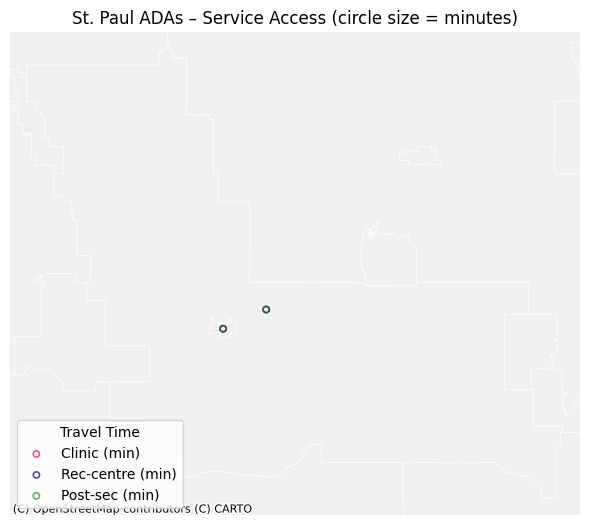

In [99]:
# 1) Compute centroids so circles sit nicely in each ADA
st_cent = stpaul.set_geometry(stpaul.geometry.centroid)

# 2) Prepare circle‐sizes, but force a lower bound of 0.2 min
#    (so that 0×100 = 0 points → invisible; 0.2×100 = 20 points → tiny dot)
st_cent['clinic_vis'] = st_cent['clinic_min'].clip(lower=0.2, upper=10)
st_cent['rec_vis']    = st_cent['rec_min'].clip(lower=0.2, upper=10)
st_cent['ps_vis']     = st_cent['ps_min'].clip(lower=0.2, upper=10)

# 3) Compute a tight bounding box around St Paul + 5 km buffer
xmin, ymin, xmax, ymax = stpaul.total_bounds
buf = 5_000
xlim = (xmin - buf, xmax + buf)
ylim = (ymin - buf, ymax + buf)

# 4) Plot
fig, ax = plt.subplots(1, 1, figsize=(6,6))

# 4a) grey‐shade all AB ADAs in that window
gdf_ab.cx[xlim[0]:xlim[1], ylim[0]:ylim[1]].plot(
    ax=ax,
    facecolor="#f0f0f0",
    edgecolor="white",
    linewidth=0.5,
    zorder=1
)

# 4b) overlay circles, sized by travel‐time (capped & min=0.2)
st_cent.plot(
    ax=ax,
    markersize=st_cent['clinic_vis'] * 100,
    facecolor="none",
    edgecolor="crimson",
    linewidth=1.2,
    alpha=0.7,
    label="Clinic (min)",
    zorder=2
)
st_cent.plot(
    ax=ax,
    markersize=st_cent['rec_vis'] * 100,
    facecolor="none",
    edgecolor="navy",
    linewidth=1.2,
    alpha=0.7,
    label="Rec-centre (min)",
    zorder=3
)
st_cent.plot(
    ax=ax,
    markersize=st_cent['ps_vis'] * 100,
    facecolor="none",
    edgecolor="forestgreen",
    linewidth=1.2,
    alpha=0.7,
    label="Post-sec (min)",
    zorder=4
)

# 4c) basemap underneath
cx.add_basemap(
    ax,
    source=cx.providers.CartoDB.Positron,
    crs=gdf_ab.crs,
    reset_extent=False
)

# 4d) finalize styling
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.axis("off")
ax.set_title("St. Paul ADAs – Service Access (circle size = minutes)")
ax.legend(loc="lower left", title="Travel Time")

plt.tight_layout()
plt.show()

/var/folders/cl/h60hyp6s1jg6rr9n0nfgvphw0000gn/T/ipykernel_3873/114273045.py:48: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="lower left")
/var/folders/cl/h60hyp6s1jg6rr9n0nfgvphw0000gn/T/ipykernel_3873/114273045.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="lower left")


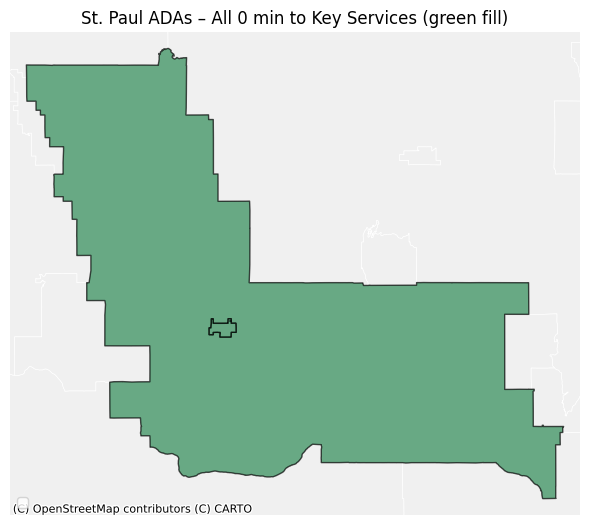

In [100]:
# 1) Identify St Paul ADAs (you already have `stpaul` GeoDataFrame)
#    and ensure all data is in Web-Mercator (EPSG:3857)
gdf_ab = gdf_ab.to_crs(epsg=3857)
stpaul = stpaul.to_crs(epsg=3857)

# 2) Compute a tight bounding box around St Paul + small buffer
xmin, ymin, xmax, ymax = stpaul.total_bounds
buf = 5_000  # metres
xlim = (xmin - buf, xmax + buf)
ylim = (ymin - buf, ymax + buf)

# 3) Plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# 3a) Light-grey shade of *all* AB ADAs in the zoom window
gdf_ab.cx[xlim[0]:xlim[1], ylim[0]:ylim[1]].plot(
    ax=ax,
    facecolor="#f0f0f0",
    edgecolor="white",
    linewidth=0.5,
    zorder=1
)

# 3b) Highlight St Paul in green
stpaul.plot(
    ax=ax,
    facecolor="seagreen",
    edgecolor="black",
    linewidth=1,
    alpha=0.7,
    zorder=2,
    label="St Paul ADAs"
)

# 3c) Add basemap underneath
cx.add_basemap(
    ax,
    source=cx.providers.CartoDB.Positron,
    crs=gdf_ab.crs,
    reset_extent=False
)

# 3d) Final touches
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.axis("off")
ax.set_title("St. Paul ADAs – All 0 min to Key Services (green fill)")
ax.legend(loc="lower left")

plt.tight_layout()
plt.show()

In [102]:
pip install ace_tools

Python(7830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [106]:
from ace_tools import display_dataframe_to_user

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
# 1) Compute the summary
summary = stpaul[['clinic_min', 'rec_min', 'ps_min']] \
             .describe() \
             .round(2)

# 2) Import and display in a nice table

display_dataframe_to_user("St. Paul Service Access Summary", summary)


ModuleNotFoundError: No module named 'ace_tools'